In [28]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print('Python:{}'.format(sys.version))
print('Numpy:{}'.format(numpy.__version__))
print('Matplotlib:{}'.format(matplotlib.__version__))
print('Pandas:{}'.format(pandas.__version__))
print('Sklearn:{}'.format(sklearn.__version__))

Python:3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy:1.16.2
Matplotlib:3.1.0
Pandas:0.25.1
Sklearn:0.22.2.post1


In [29]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
# Load the dataset 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell size', 'uniform_cell_shape', 'marginal_adhesion', 
        'single_epithelial_size', 'bare_nuclei', 'balnd_chromatin', 'normal_nuclei', 'mitosis', 'class']
df = pd.read_csv(url, names=names)

In [31]:
df.head()

,id,clump_thickness,uniform_cell size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,balnd_chromatin,normal_nuclei,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [32]:
#preprocessing the data
df.replace("?", -99999, inplace=True)
print(df.axes)

#Drop the ID Column since it doesn't do anything in machine learning
#df.drop(['id', 1, inplace = True])

#print the shape of the dataset

print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'balnd_chromatin', 'normal_nuclei', 'mitosis', 'class'],
      dtype='object')]
(699, 11)


In [33]:
#Do data set visualization 
print(df.loc[0])
print(df.describe())

id                        1000025
clump_thickness                 5
uniform_cell size               1
uniform_cell_shape              1
marginal_adhesion               1
single_epithelial_size          2
bare_nuclei                     1
balnd_chromatin                 3
normal_nuclei                   1
mitosis                         1
class                           2
Name: 0, dtype: object
                 id  clump_thickness  uniform_cell size  uniform_cell_shape  \
count  6.990000e+02       699.000000         699.000000          699.000000   
mean   1.071704e+06         4.417740           3.134478            3.207439   
std    6.170957e+05         2.815741           3.051459            2.971913   
min    6.163400e+04         1.000000           1.000000            1.000000   
25%    8.706885e+05         2.000000           1.000000            1.000000   
50%    1.171710e+06         4.000000           1.000000            1.000000   
75%    1.238298e+06         6.000000           5.0

<function matplotlib.pyplot.show(*args, **kw)>

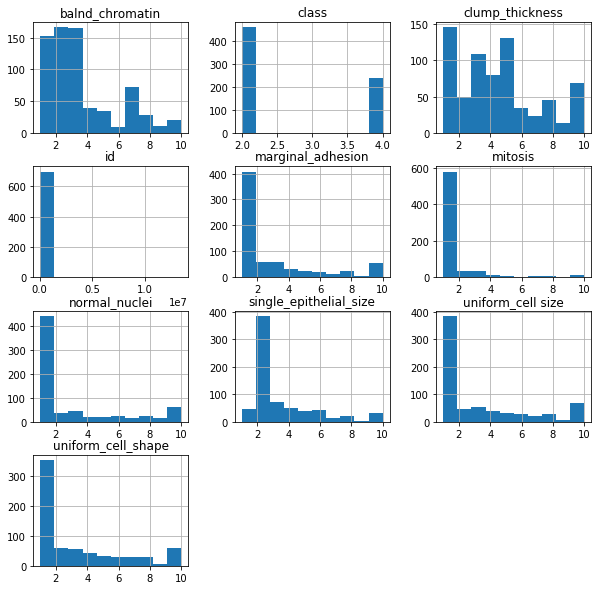

In [34]:
#plot histograms for each variable
df.hist(figsize= (10,10))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

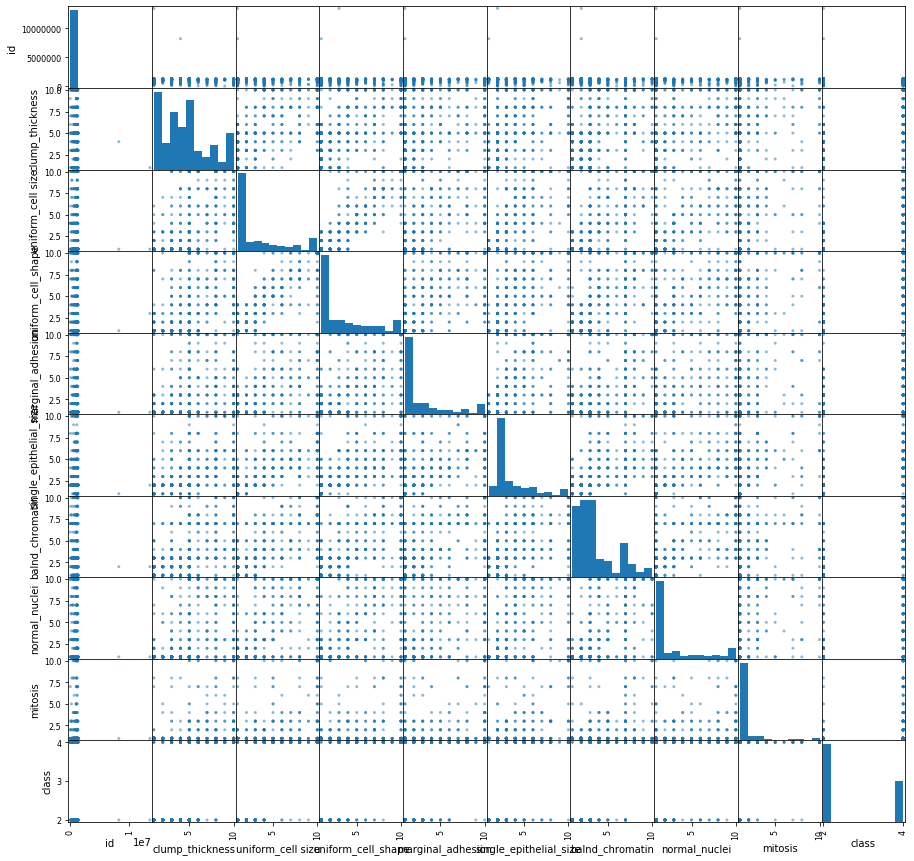

In [35]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (15,15))
plt.show

In [36]:
#Create X and Y datasets for training
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
#Specify testing options
seed = 8 
scoring = 'accuracy'

In [38]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVN', SVC()))

results = []
names = []

for name, model in models: 
    kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.595747 (0.063213)
SVN: 0.644091 (0.069435)


In [39]:
#Make predictions on validation dataset

for name, model in models: 
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.6357142857142857
              precision    recall  f1-score   support

           2       0.72      0.80      0.75        98
           4       0.35      0.26      0.30        42

    accuracy                           0.64       140
   macro avg       0.54      0.53      0.53       140
weighted avg       0.61      0.64      0.62       140

SVN
0.7
              precision    recall  f1-score   support

           2       0.70      1.00      0.82        98
           4       0.00      0.00      0.00        42

    accuracy                           0.70       140
   macro avg       0.35      0.50      0.41       140
weighted avg       0.49      0.70      0.58       140



/Users/ravisha/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
